In [ ]:
!pip install cplex

In [22]:
import pandas as pd
import cplex
import numpy as np
import matplotlib.pyplot as plt

In [23]:
flatten = lambda l: [item for sublist in l for item in sublist]
print(flatten)

<function <lambda> at 0x0000017F13D3E378>


In [24]:
xlsx = pd.ExcelFile('./data/dowjones.xlsx')
k=xlsx.sheet_names
print()
print(xlsx.parse(k))





OrderedDict([('downjones - prices',            Date     AA    AXP     BA    BAC    CAT   CSCO     CVX     DD  \
0    2002-12-31  18.69  26.71  26.55  25.59  18.05  12.61   23.84  29.25   
1    2003-01-02  19.32  27.70  27.26  26.00  18.85  13.13   24.32  29.97   
2    2003-01-03  19.53  27.80  27.51  25.84  18.72  13.39   24.50  30.12   
3    2003-01-06  20.00  28.78  27.46  26.21  19.11  13.67   25.06  30.85   
4    2003-01-07  20.00  28.39  26.80  26.25  18.89  14.06   24.54  30.76   
5    2003-01-08  17.93  28.18  26.96  26.14  18.32  13.90   24.40  30.07   
6    2003-01-09  18.46  28.78  27.28  26.49  18.69  14.40   24.78  30.56   
7    2003-01-10  18.71  28.84  27.24  26.41  18.72  14.66   24.60  30.38   
8    2003-01-13  18.76  29.12  27.60  26.62  18.83  14.71   24.45  30.17   
9    2003-01-14  19.00  29.03  27.48  26.66  18.71  15.00   24.56  30.36   
10   2003-01-15  18.21  28.46  26.84  26.28  18.62  14.62   24.44  29.32   
11   2003-01-16  18.15  28.23  26.93  26.12  18.80 

In [40]:
# parse the required sheet
data = xlsx.parse(0)
dates = data['Date']
# keep only prices
prices = data.drop( columns=['Date'] )
# temporal horizon = number of dates
T = len(prices)
# list of assets
assets = prices.columns
# N = number of assets
N = len(assets)
# r(i,t) = return of asset i at date t
returns = pd.DataFrame(data = [] )
for s in assets:
    for t in range(1,T):
        returns.at[t,s] = (prices.at[t,s] - prices.at[t-1,s]) / prices.at[t-1,s]

In [42]:
rho = returns.corr(method='pearson')
#print(rho)
mean_errors = []
returns = returns.values

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (2.68 ticks)
Found incumbent of value 16.203918 after 0.02 sec. (3.22 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.03 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Clique table members: 930.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.02 sec. (3.09 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    It

   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                           16.2039      453.0547              --- 
*     0+    0                           19.3165      453.0547              --- 
*     0     0      integral     0       19.7131       19.7131      141    0.00%
Elapsed time = 0.08 sec. (13.33 ticks, tree = 0.00 MB, solutions = 3)

Root node processing (before b&c):
  Real time             =    0.08 sec. (13.38 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.08 sec. (13.38 ticks)
solution status
MIP_optimal
Objective Solution value
19.713077039285864
Parameters values
[0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0, -0.0, 0.

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.68 ticks)
Found incumbent of value 16.203918 after 0.00 sec. (3.22 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.03 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Clique table members: 930.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (2.22 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    It

Root relaxation solution time = 0.00 sec. (2.20 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                           16.2039      453.0547              --- 
*     0+    0                           20.5960      453.0547              --- 
*     0     0      integral     0       21.5040       21.5040      109    0.00%
Elapsed time = 0.06 sec. (12.90 ticks, tree = 0.00 MB, solutions = 3)

Root node processing (before b&c):
  Real time             =    0.06 sec. (12.94 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.06 sec. (12.94 ticks)
solution status
MIP_optimal
Objective Solution value
21.50397354120378
Parameters values
[0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0,

Total (root+branch&cut) =    0.06 sec. (12.97 ticks)
solution status
MIP_optimal
Objective Solution value
22.026829436539433
Parameters values
[0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.68 ticks)
Found incumbent of value 16.203918 after 0.02 sec. (3.22 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.03 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Clique table members: 930.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (2.06 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    It

MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (1.94 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                           16.2039      453.0547              --- 
*     0+    0                           22.6076      453.0547              --- 
*     0     0      integral     0       23.4794       23.4794       79    0.00%
Elapsed time = 0.08 sec. (12.63 ticks, tree = 0.00 MB, solutions = 3)

Root node processing (before b&c):
  Real time             =    0.09 sec. (12.68 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.09 sec. (12.68 ticks)
solution status
MI


Root node processing (before b&c):
  Real time             =    0.08 sec. (12.79 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.08 sec. (12.79 ticks)
solution status
MIP_optimal
Objective Solution value
23.91664621397301
Parameters values
[-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (2.68 ticks)
Found incumbent of value 16.203918 after 0.02 sec. (3.22 ticks)
Probing time = 0.00 sec. (1.36 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 931 rows, 930 columns, and 2730 nonzeros.
Reduced MIP has 930 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.03 ticks)
Probing time = 0.02 sec. (1.36 ticks)
Clique table members: 930.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (1.71 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    It

No handles with labels found to put in legend.


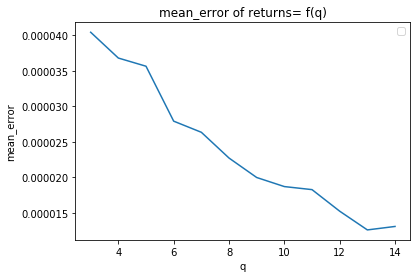

In [43]:

# parameter @q : number of assets to include in the index fund
for q in range(3,15):

    # Objective function : MAX sum_i_j rho_i_j * x_i_j   | i=1..n ; j=1..n
    # variables: xij and yj
    x_i_j = [[0] * N for i in range(N)]  # matrix 30x30
    for i in range(N):
        for j in range(N):
            x_i_j[i][j] = "x_"+str(i)+"_"+str(j)

    y_j = ["y_"+str(i) for i in range(N) ]

    # variables coefficients in the objective function is the correlation : rho
    # bounds: xij and yj are binary
    ub_x = [[1] * N for i in range(N)]
    lb_x = [[0] * N for i in range(N)]
    ub_y = [1] * N
    lb_y = [0] * N

    ###### constraints
    # sum_j (y_j) = q
    # sum_j (x_i_j) = 1 for each i=1..n
    # x_i_j - y_j <= 0 for each i,j = 1..n

    # right hand side = q , 1 (n times) , 0 (n*n times) 
    rhs = [q] + N * [1] + [0] *N*N

    # sense : = , = (n times) , <= (n*n times)
    senses = "E" + "E" * N + "L" * N * N

    # rows
    # sum_j (y_j) = q                               # 1 line
    # sum_j (x_i_j) = 1     for each i=1..n         # n lines
    # x_i_j - y_j <= 0      for each i,j = 1..n     # n*n lines

    _rows = [
        [ y_j , [1] * N ]
    ]

    for i in range(N):
        _rows.append(
            [ x_i_j[i] , [1] * N ]
        )

    for i in range(N):
        for j in range(N):
            _rows.append(
                [ [ x_i_j[i][j] , y_j[j]  ] , [1 , -1] ]
            )

    _prob = cplex.Cplex()
    _prob.objective.set_sense(_prob.objective.sense.maximize)
    ## add variables. 
    # PS: flatten matrices before adding them
    # PS: keep same order : flat(x_i_j) then y_j
    _prob.variables.add(
        obj= rho.values.flatten().tolist() + [0]*N , # y_j are not in the objective function hence their coeff is 0
        lb= flatten(lb_x) + lb_y,
        ub= flatten(ub_x) + ub_y,
        types = [_prob.variables.type.integer] * (N*N + N),
        names= flatten(x_i_j) + y_j
    )

    _prob.linear_constraints.add(
        lin_expr= _rows , 
        senses= senses, 
        rhs= rhs
    )

    _prob.solve()

    print ("solution status")
    print (_prob.solution.status[ _prob.solution.get_status() ])

    print ("Objective Solution value")
    print (_prob.solution.get_objective_value())

    print ("Parameters values")
    values = _prob.solution.get_values()
    print (values)

    y = values[-N:]

    index = []
    for i in range(N):
        if y[i] == 1.0:
            index.append(i)
            print ("asset", assets[i] , "is in the portfolio")

    ###############################################################################################################################
    ###################################################### compute weights in the index fund ######################################
    ###############################################################################################################################

    ## w_j = sum_over_i (V_i * x_i_j)
    # Dow-Jones => price weighted => V_i =  price_i / sum_i prices_i

    # x_i_j values of the solver
    x_values = values[0: N*N]

    # compute market weight at a given date: t<= T
    t = T-1

    last_prices = prices.iloc[t].values
    sum_prices = sum(last_prices)
    market_weights = []
    for p in last_prices:
        market_weights.append(p / sum_prices)

    # compute index weight
    # list x_i_j to matrix
    shape = (N, N)
    x_i_j = np.array( values[0:N*N] )
    x_i_j = x_i_j.reshape(shape)

    # wj is the total market value of the stocks represented by stock j in the fund
    wj = []
    for j in range(N):
        _wj = 0
        for i in range(N):
            _wj+= market_weights[i] * x_i_j[i][j]
        wj.append(_wj)

    ## adjust the index-fund weights so that the total equals 1
    sum_fund = sum(wj)
    for i in range(N):
        wj[i] = wj[i] / sum_fund

    ###############################################################################################################################
    ############################################ portfolio and market performance comparison ######################################
    ###############################################################################################################################

    # read dow jones market performance csv
    _csv = pd.read_csv('./data/dowjones_average.csv')
    # take the close column which the closing price of the market
    market_prices = _csv['Close']
    market_returns = []
    for i in range(1,t):
        market_returns.append( market_prices[i]/market_prices[i-1] -1  )

    index_fund_returns = []
    for i in range(0, t-1):
        index_fund_return = 0
        for x in range(N):
            index_fund_return += wj[x] * returns[i][x]
        index_fund_returns.append(index_fund_return)

    mean_error = 0
    for x in range(t-1):
        mean_error+= (market_returns[x] - index_fund_returns[x])**2
    mean_error = mean_error/(t-1)
    mean_errors.append(mean_error)

plt.plot(range(3,15) , mean_errors)
plt.title('mean_error of returns= f(q)')
plt.xlabel('q')
plt.ylabel('mean_error')
plt.legend()
plt.show()